In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
df.iloc[:20].style.background_gradient(cmap="viridis")

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [27]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [29]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [30]:
df.duplicated().sum()


0

In [31]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()


<Axes: >

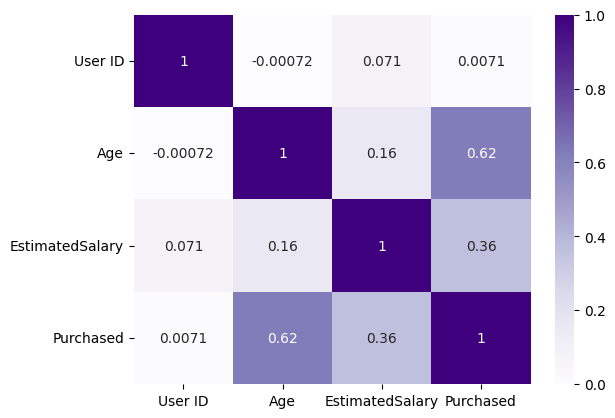

In [32]:
sns.heatmap(numeric_df.corr(), annot=True, cmap="Purples")

/var/folders/1y/yx271f4n4s52fqfr437r3qqh0000gn/T/ipykernel_4535/4081464635.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Purchased", data=df, palette="Purples")


<Axes: xlabel='Purchased', ylabel='count'>

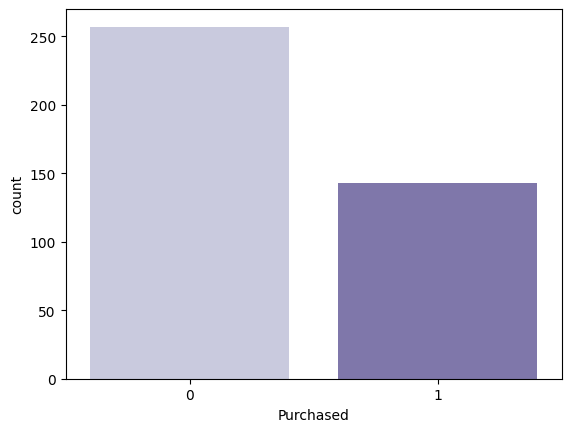

In [33]:
sns.countplot(x = "Purchased", data=df, palette="Purples")

In [34]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

/var/folders/1y/yx271f4n4s52fqfr437r3qqh0000gn/T/ipykernel_4535/1963189196.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Gender", data=df, palette="Purples")


<Axes: xlabel='Gender', ylabel='count'>

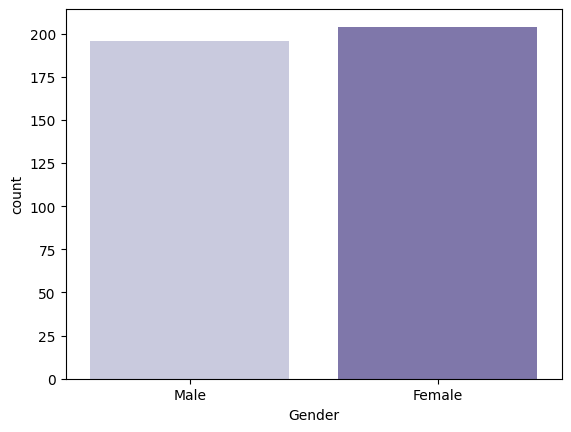

In [35]:
sns.countplot(x = "Gender", data=df, palette="Purples")

In [36]:
map_gender = {
    "Male" : 1,
    "Female" : 0
}

In [37]:
df["Gender"] = df["Gender"].map(map_gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [38]:
df[["Gender", "Purchased"]].value_counts()

Gender  Purchased
1       0            130
0       0            127
        1             77
1       1             66
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

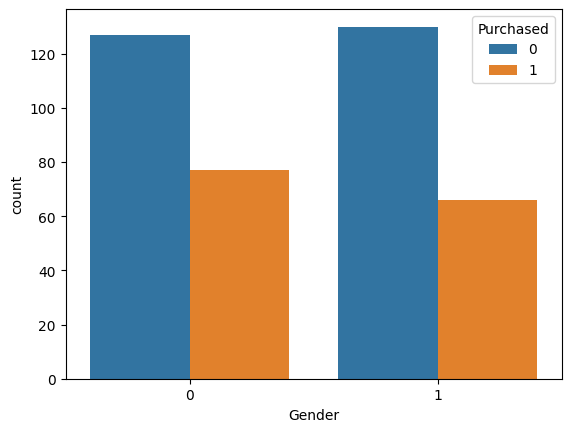

In [39]:
sns.countplot(x="Gender", data=df, hue="Purchased")

<Figure size 1000x400 with 0 Axes>

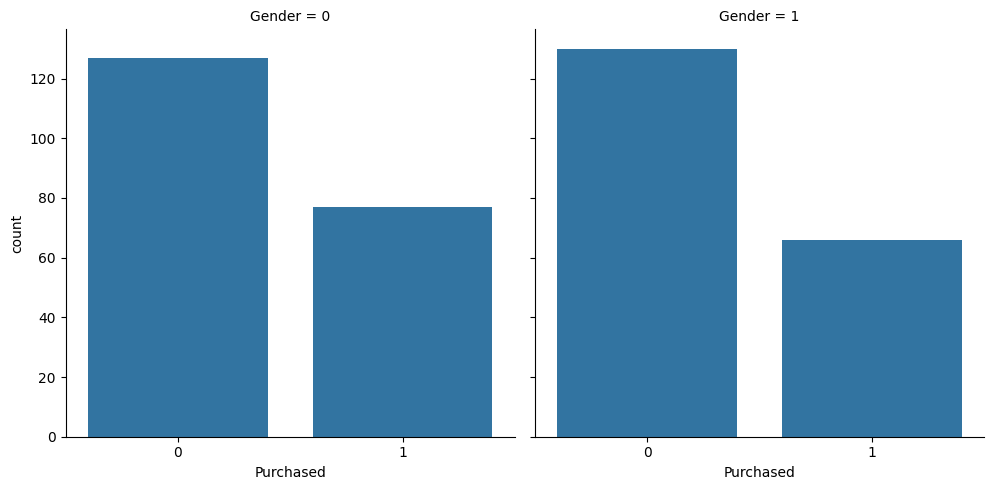

In [40]:
plt.figure(figsize=(10, 4))
sns.catplot(x="Purchased", col= "Gender", kind="count",data=df)

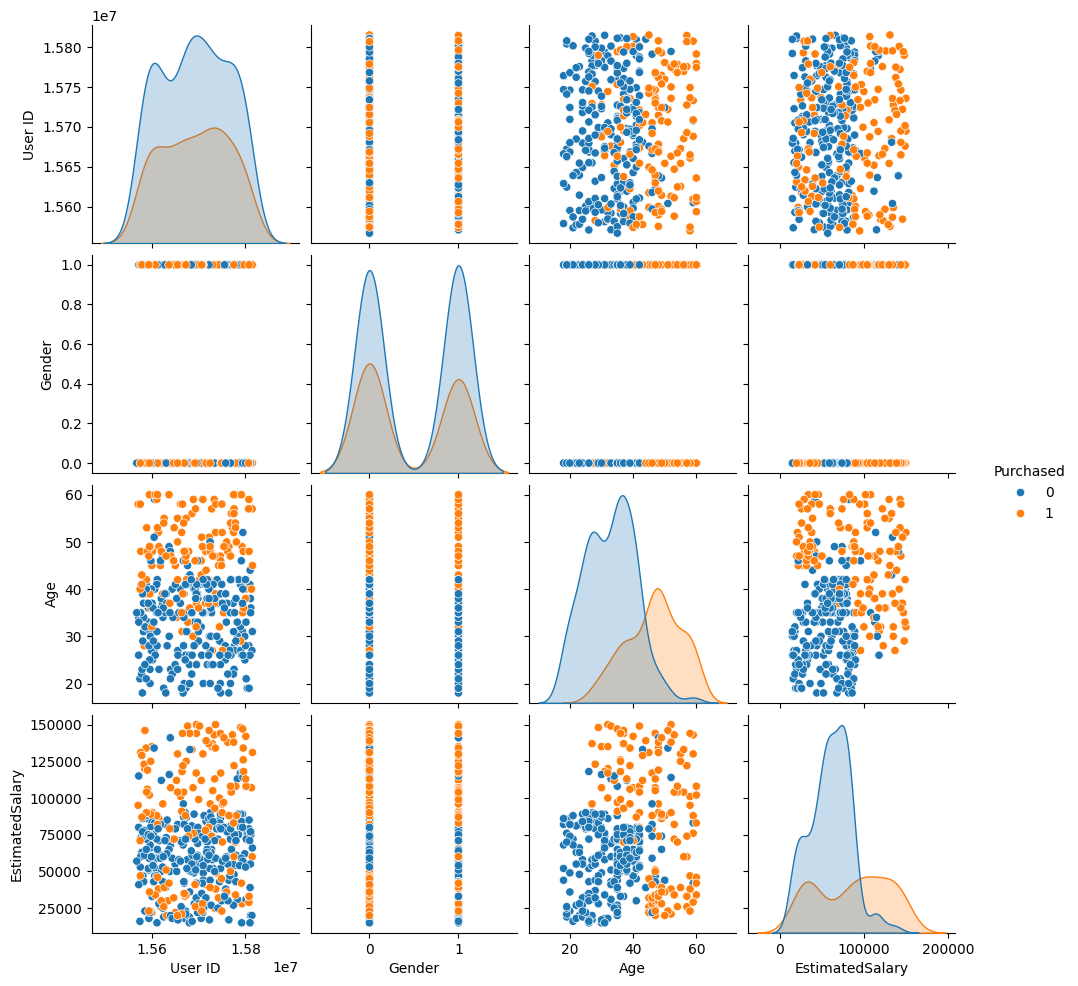

In [41]:
sns.pairplot(df, hue="Purchased")

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

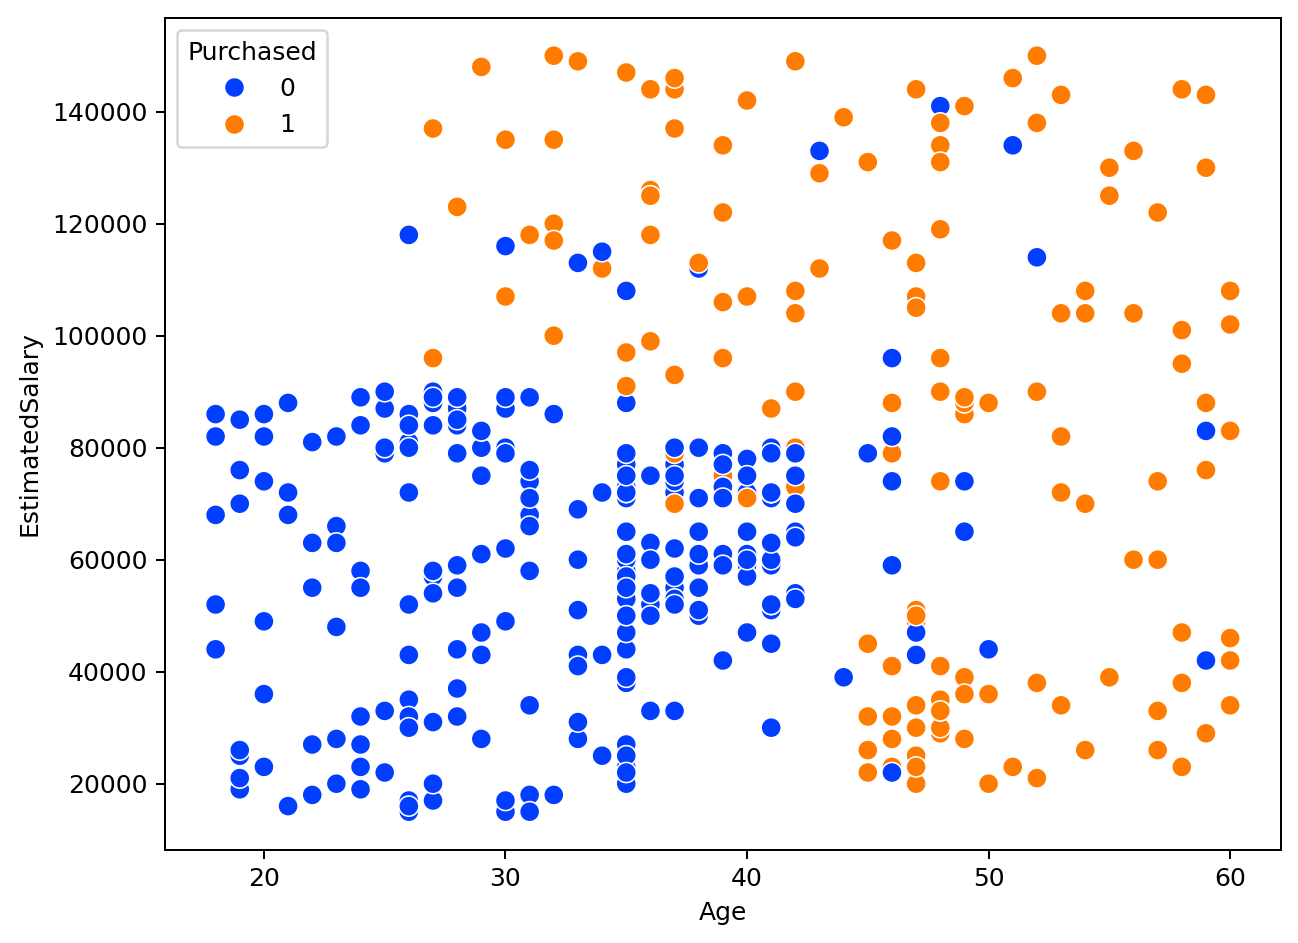

In [42]:
plt.figure(figsize=(8,6), dpi=180)
sns.scatterplot(x="Age", y="EstimatedSalary", data=df, hue="Purchased", s=65, palette="bright")

In [43]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size= 0.25, random_state = 9)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=3)

In [53]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
pred = knn.predict(scaled_X_test)

In [55]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

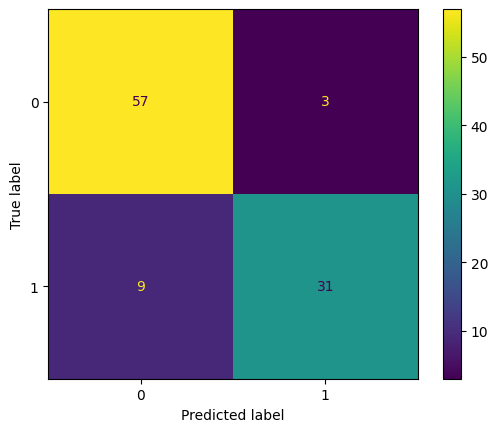

In [56]:
ConfusionMatrixDisplay.from_estimator(knn,scaled_X_test,y_test)

In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        60
           1       0.91      0.78      0.84        40

    accuracy                           0.88       100
   macro avg       0.89      0.86      0.87       100
weighted avg       0.88      0.88      0.88       100



In [59]:
errorRatio = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    pred_elbow = knn.predict(scaled_X_test)

    err = 1-accuracy_score(y_test, pred_elbow)
    errorRatio.append(err)

Text(0.5, 0, 'K Value')

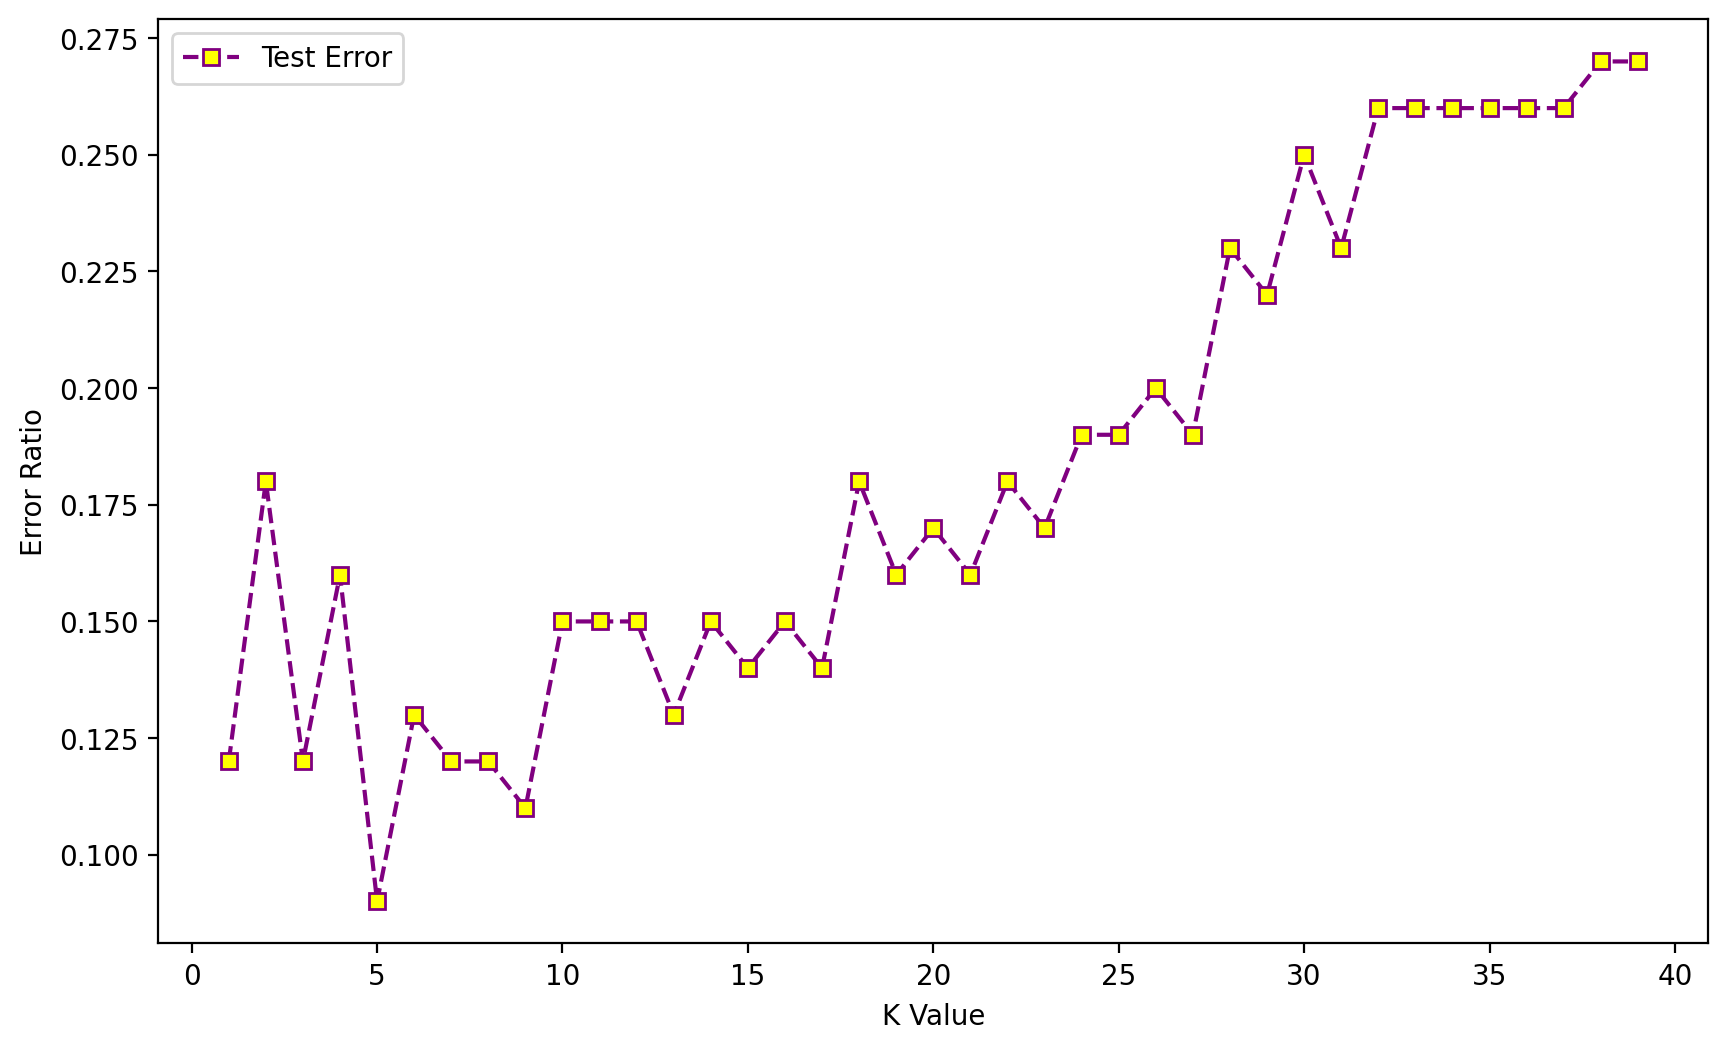

In [61]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,40),errorRatio,color="purple", linestyle="dashed" ,
 marker="s" , markerfacecolor="yellow",label='Test Error')
plt.legend()
plt.ylabel('Error Ratio')
plt.xlabel("K Value")

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)
pred_elbow = knn.predict(scaled_X_test)


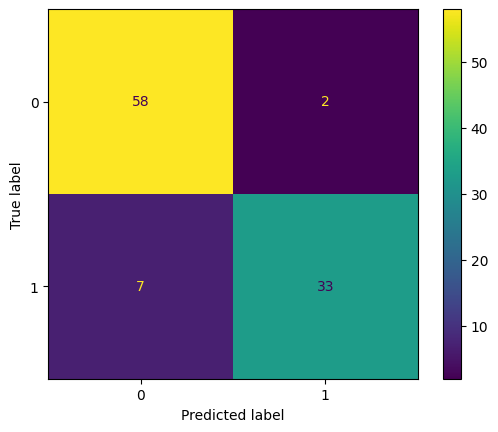

In [63]:
ConfusionMatrixDisplay.from_estimator(knn,scaled_X_test,y_test)

In [64]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        60
           1       0.91      0.78      0.84        40

    accuracy                           0.88       100
   macro avg       0.89      0.86      0.87       100
weighted avg       0.88      0.88      0.88       100

